<a href="https://colab.research.google.com/github/Joelzr01/Proyecto-de-Aprendizaje-Autom-tico-para-la-detecci-n-de-C-ncer-y-Diabetes/blob/main/Diabetes_LogroB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOGRO B**

**Grupo 2, Stalin Joel**


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importamos las librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importar el data set


### Carga los datos del archivo CSV en un DataFrame de pandas y luego muestra las primeras 5 filas y las 5 ultimas del DataFrame

In [ ]:
diab=pd.read_csv('/content/drive/My Drive/Colab Notebooks/IA/diabetes.csv')
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Embarazos/ Glucosa/ Presión arterial/ Espesor de la piel/ Insulina/ BMI (el indice de masa coorporal)/DiabetesPedigreeFunction/Edad/Resultado(salida)**


**DiabetesPedigreeFunction** función que califica la probabilidad de diabetes según los antecedentes familiares.

In [ ]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diab.count()   # conocer la cantidad que hay en cada columna

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [ ]:
diab.isnull().sum()  #verificar si no hay datos nulo

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Los datos parecen limpios. Así que podemos empezar con el análisis.

# Basico EDA

Este analisis podemos observar que los datos de la varieble independiente se divide en 2, "0 y 1" para el Outcome nos da a entenerder que 0 son lo que no tienen nada y 1 son los que tiene, y en este caso hay mas datos de personas sanas.

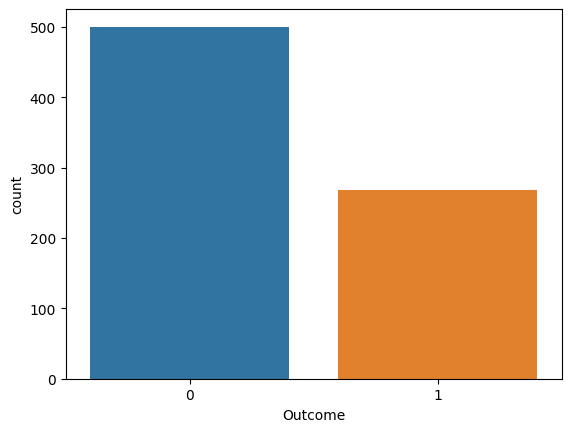

In [ ]:
sns.countplot(x='Outcome',data=diab)
plt.show()

In [ ]:
outcome=diab['Outcome']            #Crea una variable llamada outcome que almacena la columna 'Resultado
data=diab[diab.columns[:8]]           #contiene las primeras 8 columnas


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


La función train_test_splitse encuentra en la biblioteca sklearn.model_selectionde scikit-learn y se utiliza para dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para pruebas.

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome es decir la división del conjunto de datos en conjuntos de entrenamiento y prueba
X_train=train[train.columns[:8]]   #las primeras 8 columnas del conjunto de entrenamiento.
X_test=test[test.columns[:8]]       #primeras 8 columnas del conjunto de prueba
y_train=train['Outcome']              #los resultados esperados correspondientes a las muestras de entrenamiento
y_test=test['Outcome']

In [ ]:
diab.shape    # mi datos originales eran de

(768, 9)

In [ ]:
train.shape   #con entrenamiento de 75% hay lo siguiente

(576, 9)

In [ ]:
test.shape    # con prueba con 25% es lo siguiente

(192, 9)

In [ ]:
X_train.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72


In [ ]:
y_train.head()

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

# Escalado de variables

Es importante en muchos algoritmos de aprendizaje automático para garantizar que todas las características tendrán una escala similar

In [ ]:
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

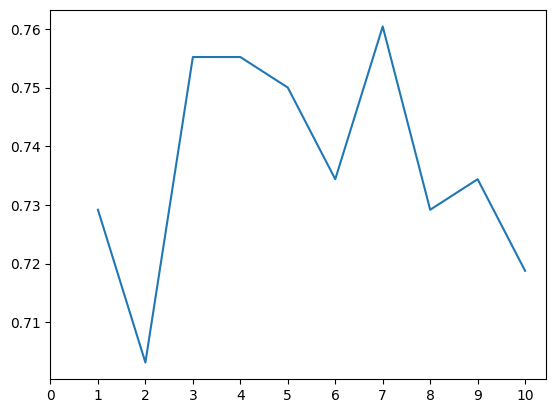

Accuracies for different values of n are: [0.72916667 0.703125   0.75520833 0.75520833 0.75       0.734375
 0.76041667 0.72916667 0.734375   0.71875   ]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

  p = 2   permite especificar el tipo de distancia a utilizar para medir la proximidad entre las muestras de datos

In [ ]:
#funcion para evaluar metricas
def evaluacion(y_true, y_pred, metricas):     #y_true  representa los resultados esperados, y_pred  representa las etiquetas predichas por un modelo, metricas  un diccionario que contiene  los nombres de las métricas
  res = {}                                 # almacena los resultados de las métricas
  for nombre, funcion in metricas.items():     #calcular la métrica se almacena en la variable
    res[nombre] = funcion(y_true, y_pred)         #El resultado de cada métrica se asigna al diccionario res
  return res



#Se crea un diccionario con los algoritmos a evaluar
algoritmos = {
              'Logistic Regression': LogisticRegression(random_state=42),
              'Descition Tree': DecisionTreeClassifier(criterion='entropy', random_state=42),
              'SVM': SVC(kernel = "rbf", C=10, random_state=42, probability=True),
              'Random Forest': RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 42),
              'KNN': KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
              'Naive Bayes': GaussianNB(),
              }


#funcion para evaluar metricas
def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = np.round(funcion(y_true, y_pred),4)    #El resultado de cada métrica se redondea a 4 decimales usando np.roundy
    return res                                                 #se asigna al diccionario resusando el nombre de la métrica como clave.

k=7

metricas = {
  'ACC':   metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='macro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='macro'),           #average='macro'para calcular la recuperación promedio en cada clase y devolver la media no ponderada.
  'ROC':    lambda y_true, y_pred:
            metrics.roc_auc_score(y_true, y_pred, average='macro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='macro'),
  'MSE':    lambda y_true, y_pred:
            metrics.mean_squared_error(y_true, y_pred),           #No se utiliza averageen esta métrica, ya que se trata de un problema de regresión
  'MAE':    lambda y_true, y_pred:
            metrics.mean_absolute_error(y_true, y_pred)
}

y_pred = {}
headers = ['METRICS']
ACC,PREC,RECALL,F1,ROC,MSE,MAE = ['ACCURACY'],['PRECISION'],['RECALL'],['F1'],['ROC'],['MSE'],['MAE']

for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_train, y_train, cv=KFold(n_splits=k, shuffle=True, random_state=42))
    results = evaluacion(y_train, y_pred[nombre], metricas)
    headers.append(nombre)
    ACC.append(results['ACC'])
    PREC.append(results['PREC'])
    RECALL.append(results['RECALL'])
    F1.append(results['F1'])
    ROC.append(results['ROC'])
    MSE.append(results['MSE'])
    MAE.append(results['MAE'])

my_data = [tuple(ACC), tuple(PREC), tuple(RECALL), tuple(F1), tuple(ROC), tuple(MSE), tuple(MAE)]
print(tabulate(my_data, headers=headers))


METRICS      Logistic Regression    Descition Tree     SVM    Random Forest     KNN    Naive Bayes
---------  ---------------------  ----------------  ------  ---------------  ------  -------------
ACCURACY                  0.776             0.6944  0.724            0.7708  0.7066         0.7465
PRECISION                 0.7618            0.6655  0.6947           0.7501  0.6738         0.7218
RECALL                    0.7276            0.6684  0.6853           0.7328  0.6558         0.7038
F1                        0.7382            0.6668  0.689            0.7394  0.6611         0.7102
ROC                       0.7276            0.6684  0.6853           0.7328  0.6558         0.7038
MSE                       0.224             0.3056  0.276            0.2292  0.2934         0.2535
MAE                       0.224             0.3056  0.276            0.2292  0.2934         0.2535


este bucle for nombre, alg in algoritmos.items():

se utiliza para iterar sobre diferentes algoritmos de aprendizaje automático especificados en el diccionario algoritmos. Para cada algoritmo, se realiza una validación cruzada y se obtienen las predicciones durante la validación cruzada. Luego, se evalúan las predicciones utilizando diversas métricas definidas en el diccionario metricas, y los resultados se almacenan en el diccionario results.

# Comparacion de los acurracy de **ENTRENAMIENTO**

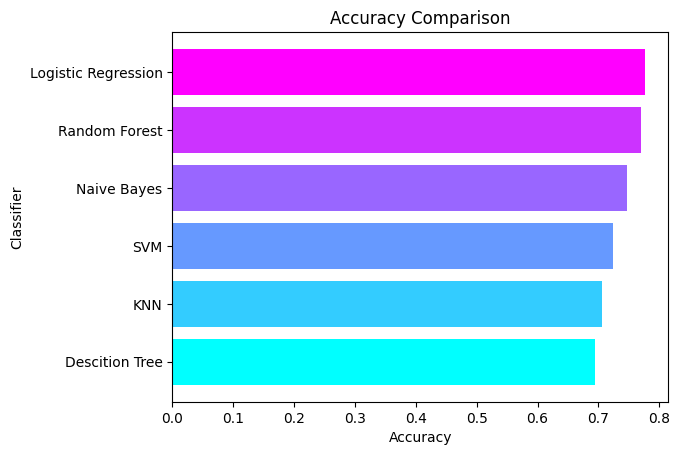

El clasificador con el Accuracy más alto es: Logistic Regression
El valor del máximo Accuracy es: 0.776


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = headers[1:]  # Utilizamos los nombres de los clasificadores almacenados en 'headers'
accuracy_values = ACC[1:]  # Utilizamos los valores de accuracy almacenados en 'ACC'

# Ordenar las clasificaciones y los valores de Accuracy en función del Accuracy descendente
sorted_indices = np.argsort(accuracy_values)[::1]
classifiers_sorted = [classifiers[i] for i in sorted_indices]
accuracy_values_sorted = [accuracy_values[i] for i in sorted_indices]

# Configurar posición de las barras
position = np.arange(len(classifiers_sorted))

# Crear un mapa de colores gradual utilizando una escala de color predefinida
cmap = plt.cm.get_cmap('cool')  # Puedes cambiar el nombre de la escala de color según tus preferencias

# Crear gráfico de barras horizontal con colores graduales
plt.barh(position, accuracy_values_sorted, align='center', color=cmap(np.linspace(0, 1, len(classifiers_sorted))))

# Etiquetar las barras con los nombres de las clasificaciones
plt.yticks(position, classifiers_sorted)

plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')

plt.show()

# Encontrar el clasificador con el Accuracy más alto
max_accuracy_classifier = classifiers_sorted[-1]
print("El clasificador con el Accuracy más alto es:", max_accuracy_classifier)

max_accuracy = accuracy_values_sorted[-1]
print("El valor del máximo Accuracy es:", max_accuracy)

fue el mejorLogistic Regression pero el que le seguia era el Random Forest 0.7708

# Evaluar los Algoritmos con el conjunto de TEST

In [ ]:
headers = ['METRICS']
ACC,PREC,RECALL,F1,ROC,MSE,MAE = ['ACCURACY'],['PRECISION'],['RECALL'],['F1'],['ROC'],['MSE'],['MAE']
for nombre, alg in algoritmos.items():
    y_pred = alg.fit(X_train, y_train).predict(X_test)
    results = evaluacion(y_test, y_pred, metricas)
    headers.append(nombre)
    ACC.append(results['ACC'])
    PREC.append(results['PREC'])
    RECALL.append(results['RECALL'])
    F1.append(results['F1'])
    ROC.append(results['ROC'])
    MSE.append(results['MSE'])
    MAE.append(results['MAE'])

my_data = [tuple(ACC), tuple(PREC), tuple(RECALL), tuple(F1), tuple(ROC), tuple(MSE), tuple(MAE)]
print(tabulate(my_data, headers=headers))

METRICS      Logistic Regression    Descition Tree     SVM    Random Forest     KNN    Naive Bayes
---------  ---------------------  ----------------  ------  ---------------  ------  -------------
ACCURACY                  0.7812            0.724   0.7604           0.7917  0.7604         0.7656
PRECISION                 0.7672            0.6966  0.7396           0.7758  0.7411         0.7426
RECALL                    0.735             0.698   0.7156           0.7534  0.7121         0.7334
F1                        0.7455            0.6973  0.7237           0.7618  0.7212         0.7373
ROC                       0.735             0.698   0.7156           0.7534  0.7121         0.7334
MSE                       0.2188            0.276   0.2396           0.2083  0.2396         0.2344
MAE                       0.2188            0.276   0.2396           0.2083  0.2396         0.2344


# Comparacion de los acurracy de **TEST**

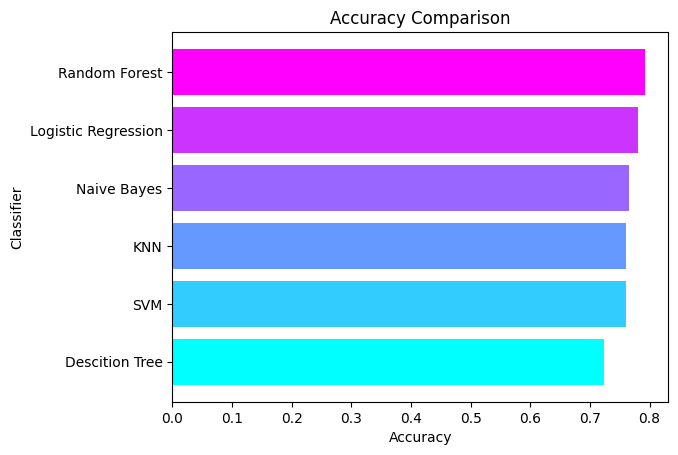

El clasificador con el Accuracy más alto es: Random Forest
El valor del máximo Accuracy es: 0.7917


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = headers[1:]  # Utilizamos los nombres de los clasificadores almacenados en 'headers'
accuracy_values = ACC[1:]  # Utilizamos los valores de accuracy almacenados en 'ACC'

# Ordenar las clasificaciones y los valores de Accuracy en función del Accuracy descendente
sorted_indices = np.argsort(accuracy_values)[::1]
classifiers_sorted = [classifiers[i] for i in sorted_indices]
accuracy_values_sorted = [accuracy_values[i] for i in sorted_indices]

# Configurar posición de las barras
position = np.arange(len(classifiers_sorted))

# Crear un mapa de colores gradual utilizando una escala de color predefinida
cmap = plt.cm.get_cmap('cool')  # Puedes cambiar el nombre de la escala de color según tus preferencias

# Crear gráfico de barras horizontal con colores graduales
plt.barh(position, accuracy_values_sorted, align='center', color=cmap(np.linspace(0, 1, len(classifiers_sorted))))

# Etiquetar las barras con los nombres de las clasificaciones
plt.yticks(position, classifiers_sorted)

plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')

plt.show()

# Encontrar el clasificador con el Accuracy más alto
max_accuracy_classifier = classifiers_sorted[-1]
print("El clasificador con el Accuracy más alto es:", max_accuracy_classifier)

max_accuracy = accuracy_values_sorted[-1]
print("El valor del máximo Accuracy es:", max_accuracy)


fue el mejor  Random Forest 0.7917  pero el que le seguia    Logistic Regression 0.7812

# Elaborar una matriz de confusión

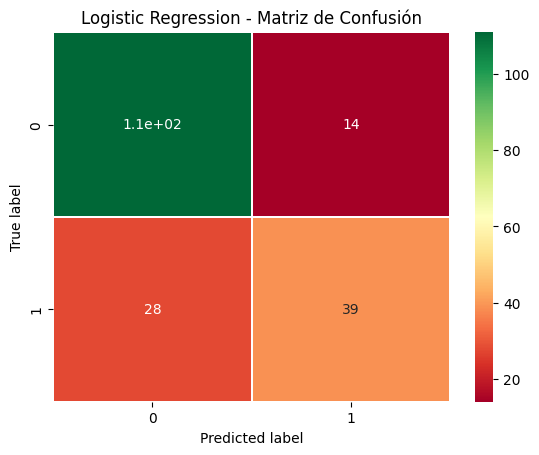

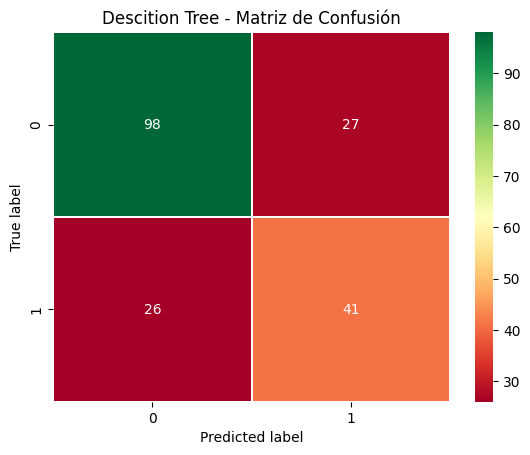

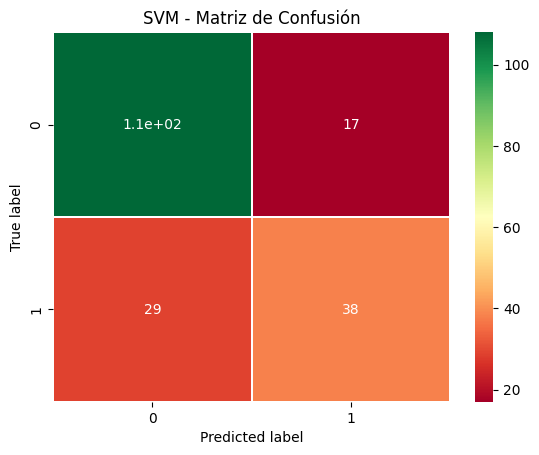

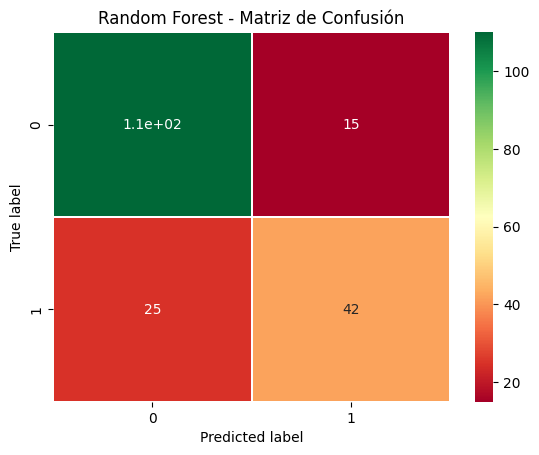

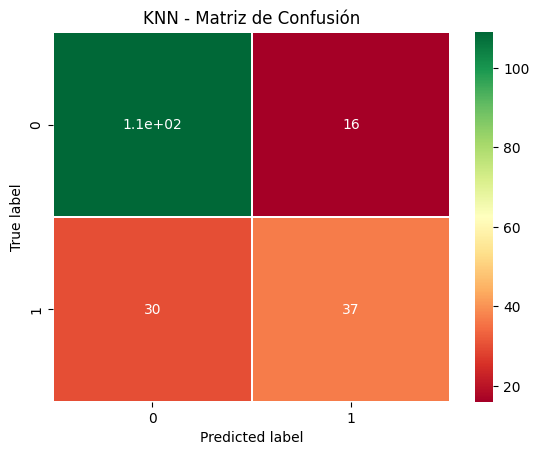

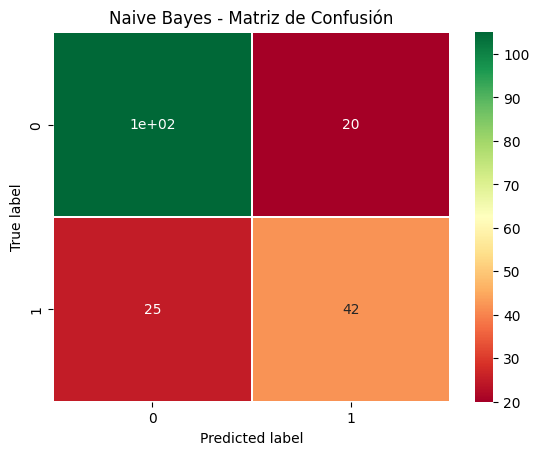

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for nombre, alg in algoritmos.items():
    y_pred = alg.fit(X_train, y_train).predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='RdYlGn', linewidths=0.2)
    plt.title(nombre + ' - Matriz de Confusión')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

En base a los valores

Verdaderos positivos (VP): Hay 1.1+02 casos en los que el modelo predijo correctamente la clase positiva.
Falsos positivos (FP): Se encontraron 14 casos en los que el modelo predijo incorrectamente la clase positiva.
Verdaderos negativos (VN): Hay 39 casos en los que el modelo predijo correctamente la clase negativa.
Falsos negativos (FN): Se encontraron 28 casos en los que el modelo predijo incorrectamente la clase negativa.

La alta precisión indica que el modelo tiene una menor tasa de falsos positivos,lo que significa que la mayoría de las veces predice correctamente la clase positiva

# Correlation Matrix

La "Correlation Matrix" (Matriz de conexiones) es una matriz que muestra la relación de conexiones entre pares de variables en un conjunto de datos. Es una herramienta utilizada en el análisis exploratorio de datos y en la estadística descriptiva para comprender cómo se relacionan entre sí las diferentes variables.

Un valor de 1 indica una conexión positiva perfecta, lo que significa que las variables están altamente relacionadas de manera directa.
Un valor de -1 indica una conexión negativa perfecta, lo que significa que las variables están altamente relacionadas de manera inversa.
Un valor de 0 indica que no hay correlación lineal entre las variables, lo que significa que no hay una relación lineal clara entre ellas.

la matriz son la variable independiente que es la de los resultaso

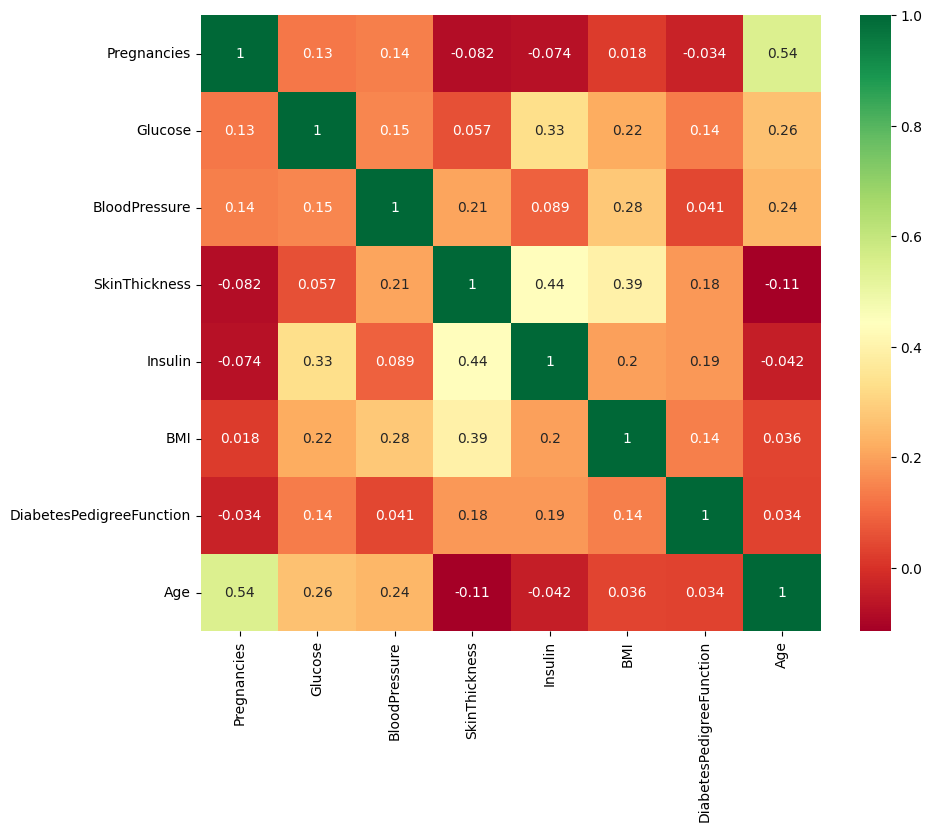

In [ ]:
sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

la matriz con todas sus columnas

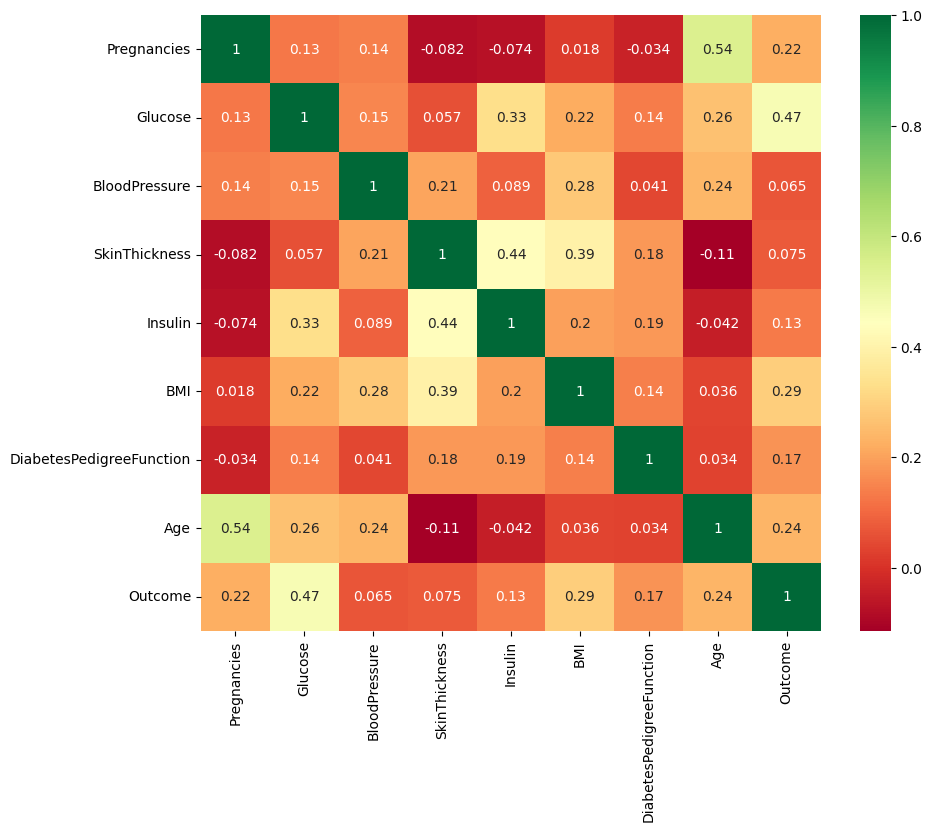

In [ ]:
sns.heatmap(diab.corr(),annot=True,cmap='RdYlGn')   # esta integrada la columna de salida
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

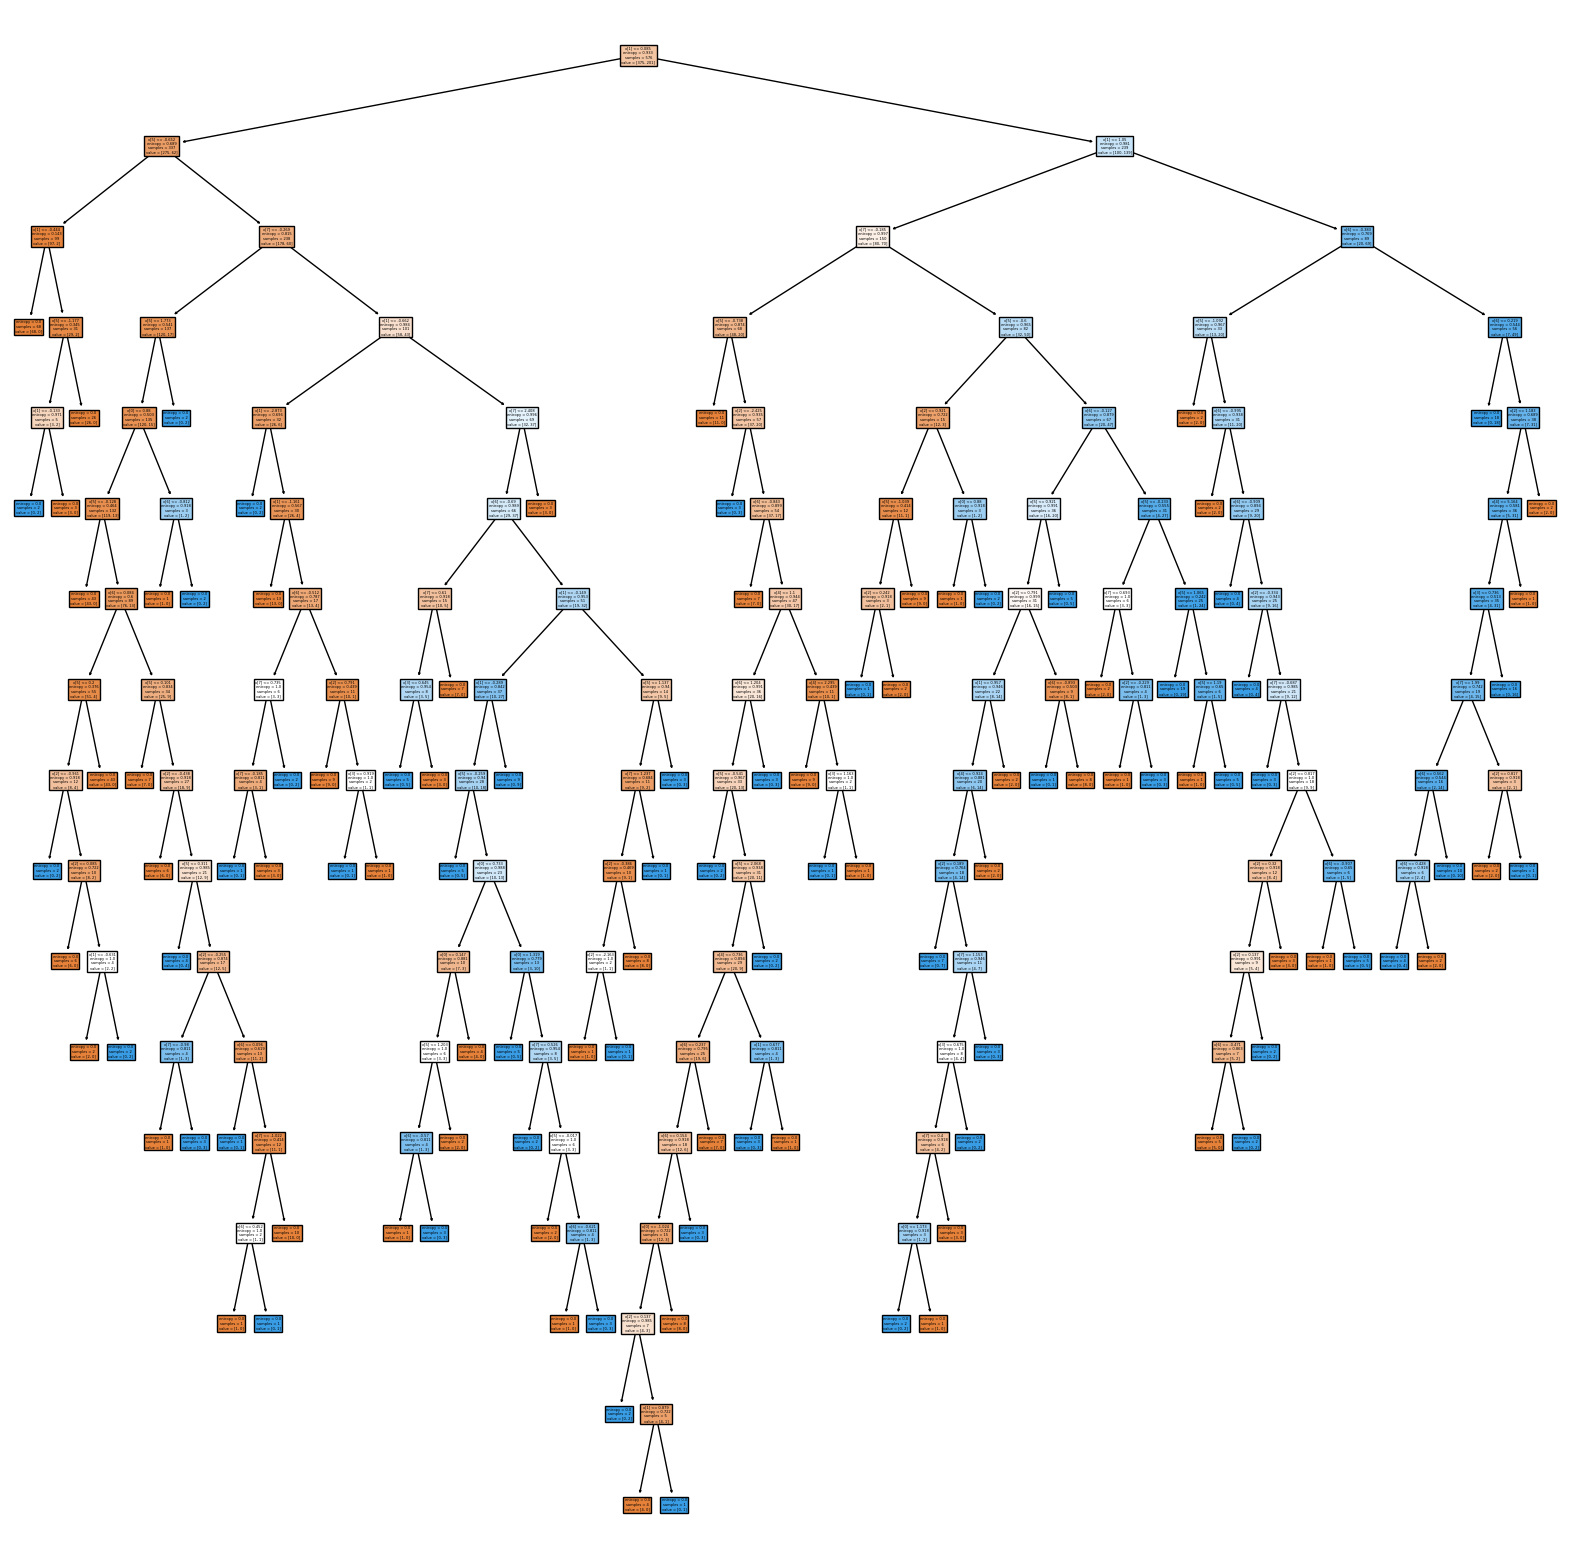

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

classifier = algoritmos['Descition Tree']
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según tus necesidades
plot_tree(classifier, filled=True)
plt.savefig('arbol.png')


**METRICAS**

**ACURACY**

![Machine-Learning-Accuracy[1].png](https://sitiobigdata.com/wp-content/uploads/2019/01/Machine-Learning-Accuracy.png)

MSE

![Machine-Learning-MSE[1].png](https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)



